# 1. Các bước xử lý chung <a class="anchor" id="2"></a>

## Import thư viện

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
import sklearn.metrics as metrics

### Import và xem tổng quan về dataset

#### Import dataset

In [2]:
data = 'Bike_Accessories_Sales.xlsx'
df = pd.read_excel(data)

#### Kích thước dataset

In [3]:
print('The shape of the dataset : ', df.shape)

The shape of the dataset :  (12051, 21)


Chúng ta có thể thấy rằng có 12051 trường hợp và 21 thuộc tính trong tập dữ liệu.

#### Xem dataset

In [4]:
df

,transaction_id,product_id,customer_id,transaction_date,transaction_month,online_order,transaction_status,product_brand,product_line,product_class,...,total,list_price,gender,past_3_years_bike_related_purchases,customer_dob,age_group,job_industry_category,tenure,cus_category_name,state
0,5323,11,3010,2017-01-01,January,False,Approved,Giant Bicycles,Standard,high,...,1274.93,509.97,Female,16,1970-05-20,U60,IT,5,Evasive Customer,NSW
1,3525,50,3490,2017-01-01,January,True,Approved,Giant Bicycles,Standard,medium,...,1403.50,448.68,Male,45,1980-06-21,U40,Financial Services,14,Evasive Customer,NSW
2,3460,64,234,2017-01-01,January,True,Approved,Giant Bicycles,Standard,high,...,1977.36,217.51,Female,71,1969-08-12,U60,Retail,12,Platinum Customer,NSW
3,140,11,462,2017-01-01,January,False,Approved,Giant Bicycles,Standard,high,...,1274.93,509.97,Female,32,1960-01-01,U60,Manufacturing,5,Almost Lost Customer,NSW
4,19158,32,671,2017-01-01,January,False,Approved,Giant Bicycles,Standard,medium,...,1403.50,448.68,Male,49,1984-07-25,U40,Argiculture,5,Losing Customer,NSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12046,7518,65,3433,2017-12-30,December,False,Approved,WeareA2B,Standard,medium,...,1992.93,1230.30,Female,10,1998-04-28,U20,Property,2,Platinum Customer,VIC
12047,9820,31,1425,2017-12-30,December,True,Approved,WeareA2B,Standard,medium,...,1992.93,1230.30,Male,20,1986-07-06,U40,Retail,11,Becoming Loyal,NSW
12048,12667,89,1594,2017-12-30,December,True,Approved,WeareA2B,Touring,medium,...,1362.99,1305.25,Male,62,1981-11-26,U40,Property,7,Very Loyal,NSW
12049,16166,89,2345,2017-12-30,December,False,Approved,WeareA2B,Touring,medium,...,1362.99,1305.25,Female,50,1986-07-15,U40,Retail,3,Becoming Loyal,QLD


#### Thông tin tổng quan dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12051 entries, 0 to 12050
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       12051 non-null  int64         
 1   product_id                           12051 non-null  int64         
 2   customer_id                          12051 non-null  int64         
 3   transaction_date                     12051 non-null  datetime64[ns]
 4   transaction_month                    12051 non-null  object        
 5   online_order                         12051 non-null  bool          
 6   transaction_status                   12051 non-null  object        
 7   product_brand                        12051 non-null  object        
 8   product_line                         12051 non-null  object        
 9   product_class                        12051 non-null  object        
 10  product_si

#### Xóa các cột kiểu datetime, id và một số biến không có tác dụng cho việc phân loại

In [6]:
columns_to_drop = ['transaction_id', 'product_id', 'customer_id', 
                   'transaction_date', 'customer_dob', 'job_industry_category',
                   'past_3_years_bike_related_purchases', 'tenure']
df = df.drop(columns_to_drop, axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12051 entries, 0 to 12050
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_month   12051 non-null  object 
 1   online_order        12051 non-null  bool   
 2   transaction_status  12051 non-null  object 
 3   product_brand       12051 non-null  object 
 4   product_line        12051 non-null  object 
 5   product_class       12051 non-null  object 
 6   product_size        12051 non-null  object 
 7   total               12051 non-null  float64
 8   list_price          12051 non-null  float64
 9   gender              12051 non-null  object 
 10  age_group           12051 non-null  object 
 11  cus_category_name   12051 non-null  object 
 12  state               12051 non-null  object 
dtypes: bool(1), float64(2), object(10)
memory usage: 1.1+ MB


#### Kiểm tra các giá trị còn thiếu

In [8]:
df.isnull().sum()

transaction_month     0
online_order          0
transaction_status    0
product_brand         0
product_line          0
product_class         0
product_size          0
total                 0
list_price            0
gender                0
age_group             0
cus_category_name     0
state                 0
dtype: int64

#### Chúng ta có thể thấy rằng không có giá trị nào bị thiếu trong tập dữ liệu.

#### Chuyển cột online_order kiểu boolean về kiểu int

In [9]:
df['online_order'] = df['online_order'].astype(int)

In [10]:
df.online_order.unique()

array([0, 1])

#### Chuyển đổi các biến phân loại về dạng số để dễ train

In [11]:
type_transaction_month = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 
       'July':7,'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
df.transaction_month = df.transaction_month.map(type_transaction_month)

type_product_brand = {'Giant Bicycles':1, 'Norco Bicycles':2, 'OHM Cycles':3, 'WeareA2B':4}
df.product_brand = df.product_brand.map(type_product_brand)

type_product_line = {'Standard':1, 'Road':2, 'Touring':3, 'Mountain':4}
df.product_line = df.product_line.map(type_product_line)

type_product_class = {'high':1, 'medium':2, 'low':3}
df.product_class = df.product_class.map(type_product_class)

type_product_size = {'medium':1, 'small':2, 'large':3}
df.product_size = df.product_size.map(type_product_size)

type_gender = {'Female':1, 'Male':2, 'U':3}
df.gender = df.gender.map(type_gender)

type_age_group = {'U20':1, 'U40':2,'U60':3, 'U100':4}
df.age_group = df.age_group.map(type_age_group)

type_cus_category_name = {'Evasive Customer':1, 'Platinum Customer':2, 'Almost Lost Customer':3,
       'Losing Customer':4, 'Becoming Loyal':5, 'Potential Customer':6,
       'Lost Customer':7, 'Very Loyal':8, 'Recent Customer':9, 'Late Bloomer':10,
       'High Risk Customer':11}
df.cus_category_name = df.cus_category_name.map(type_cus_category_name)

type_state = {'NSW':1, 'QLD':2, 'VIC':3}
df.state = df.state.map(type_state)

#### Khám phá biến mục tiêu `transaction_status`

In [12]:
# Kiểm tra giá trị còn thiếu
df['transaction_status'].isnull().sum()

0

In [13]:
# Xem các giá trị duy nhất
df['transaction_status'].unique()

array(['Approved', 'Cancelled'], dtype=object)

Hai giá trị duy nhất là `Cancelled` và `Approved`.

In [14]:
df['transaction_status'].value_counts()

Approved     9444
Cancelled    2607
Name: transaction_status, dtype: int64

# 2. Chuẩn bị dữ liệu <a class="anchor" id="2"></a>

### Tách thuộc tính mục tiêu “transaction_status”

In [14]:
X = df.drop(['transaction_status'], axis=1)
y = df['transaction_status']

### Chia dữ liệu thành tập huấn luyện và kiểm tra riêng biệt <a class="anchor" id="8"></a>

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Kiểm tra kích thước của X_train và X_test

In [16]:
# Kiểm tra kích thước của X_train và X_test
X_train.shape, X_test.shape

((8435, 12), (3616, 12))

Chúng ta có thể thấy rằng không có giá trị nào bị thiếu trong X_train và X_test.

In [17]:
X_train.head()

,transaction_month,online_order,product_brand,product_line,product_class,product_size,total,list_price,gender,age_group,cus_category_name,state
6579,3,1,3,1,2,1,912.52,771.12,2,3,3,3
11147,9,1,4,1,2,1,1992.93,1230.30,1,2,11,2
5033,9,0,2,1,2,2,586.45,64.51,1,2,11,1
2702,11,0,1,2,3,2,590.26,64.93,1,3,11,3
5822,12,1,2,1,3,1,958.74,209.84,2,3,10,3


In [18]:
X_test.head()

,transaction_month,online_order,product_brand,product_line,product_class,product_size,total,list_price,gender,age_group,cus_category_name,state
7667,7,0,3,1,1,1,1458.17,583.27,1,3,10,1
1899,8,1,1,1,2,1,1403.50,448.68,1,3,8,1
9007,1,0,4,1,2,1,1992.93,1230.30,2,2,10,1
8691,12,1,3,1,2,1,912.52,771.12,1,3,6,1
2301,9,0,1,1,1,1,1129.13,451.65,1,3,11,1


# 3. Train Model <a class="anchor" id="2"></a>

## 3.1 Random Forest Classifier model <a class="anchor" id="12"></a>

In [19]:
# Khởi tạo trình phân loại với n_estimators = 100
rf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit mô hình vào tập huấn luyện
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

## Dự đoán

In [20]:
# Dự đoán trên tập test
y_pred_rf =rf.predict(X_test)

## Tính độ chính xác

In [21]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

    Approved       0.98      0.99      0.99      2849
   Cancelled       0.96      0.94      0.95       767

    accuracy                           0.98      3616
   macro avg       0.97      0.97      0.97      3616
weighted avg       0.98      0.98      0.98      3616



## Xuất ra ma trận nhầm lẫn (Confusion Matrix)

Confusion matrix

 [[2819   30]
 [  44  723]]


<AxesSubplot: >

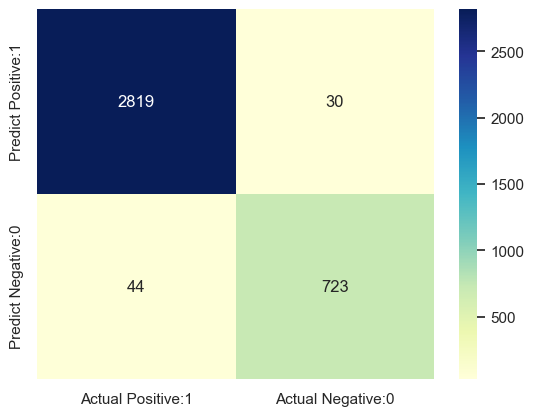

In [59]:
# In Ma trận nhầm lẫn và chia thành 4 phần
cm = confusion_matrix(y_test, y_pred_rf)
print('Confusion matrix\n\n', cm)
# Trực quan hóa ma trận nhầm lẫn với bản đồ nhiệt seaborn
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Nhận xét:
-	Kết quả dự đoán đúng với thực tế Approved là 2819 dòng, với Cancelled là 30 dòng,
-	Kết quả dự đoán sai với thực tế Approved là 44 dòng, với Cancelled là 723 dòng

# Biểu diễn thuộc tính quan trọng


In [22]:
# Tìm giá trị thuộc tính quan trọng
rf.feature_importances_

array([0.56124771, 0.00788002, 0.22009439, 0.00987702, 0.00818148,
       0.00959001, 0.0481672 , 0.06882922, 0.00770916, 0.01371571,
       0.03371175, 0.01099634])

In [23]:
# Tìm tên thuộc tính quan trọng
rf.feature_names_in_

array(['transaction_month', 'online_order', 'product_brand',
       'product_line', 'product_class', 'product_size', 'total',
       'list_price', 'gender', 'age_group', 'cus_category_name', 'state'],
      dtype=object)

In [24]:
# Tạo tệp dữ liệu mẫu
feature_names = rf.feature_names_in_
importances = rf.feature_importances_

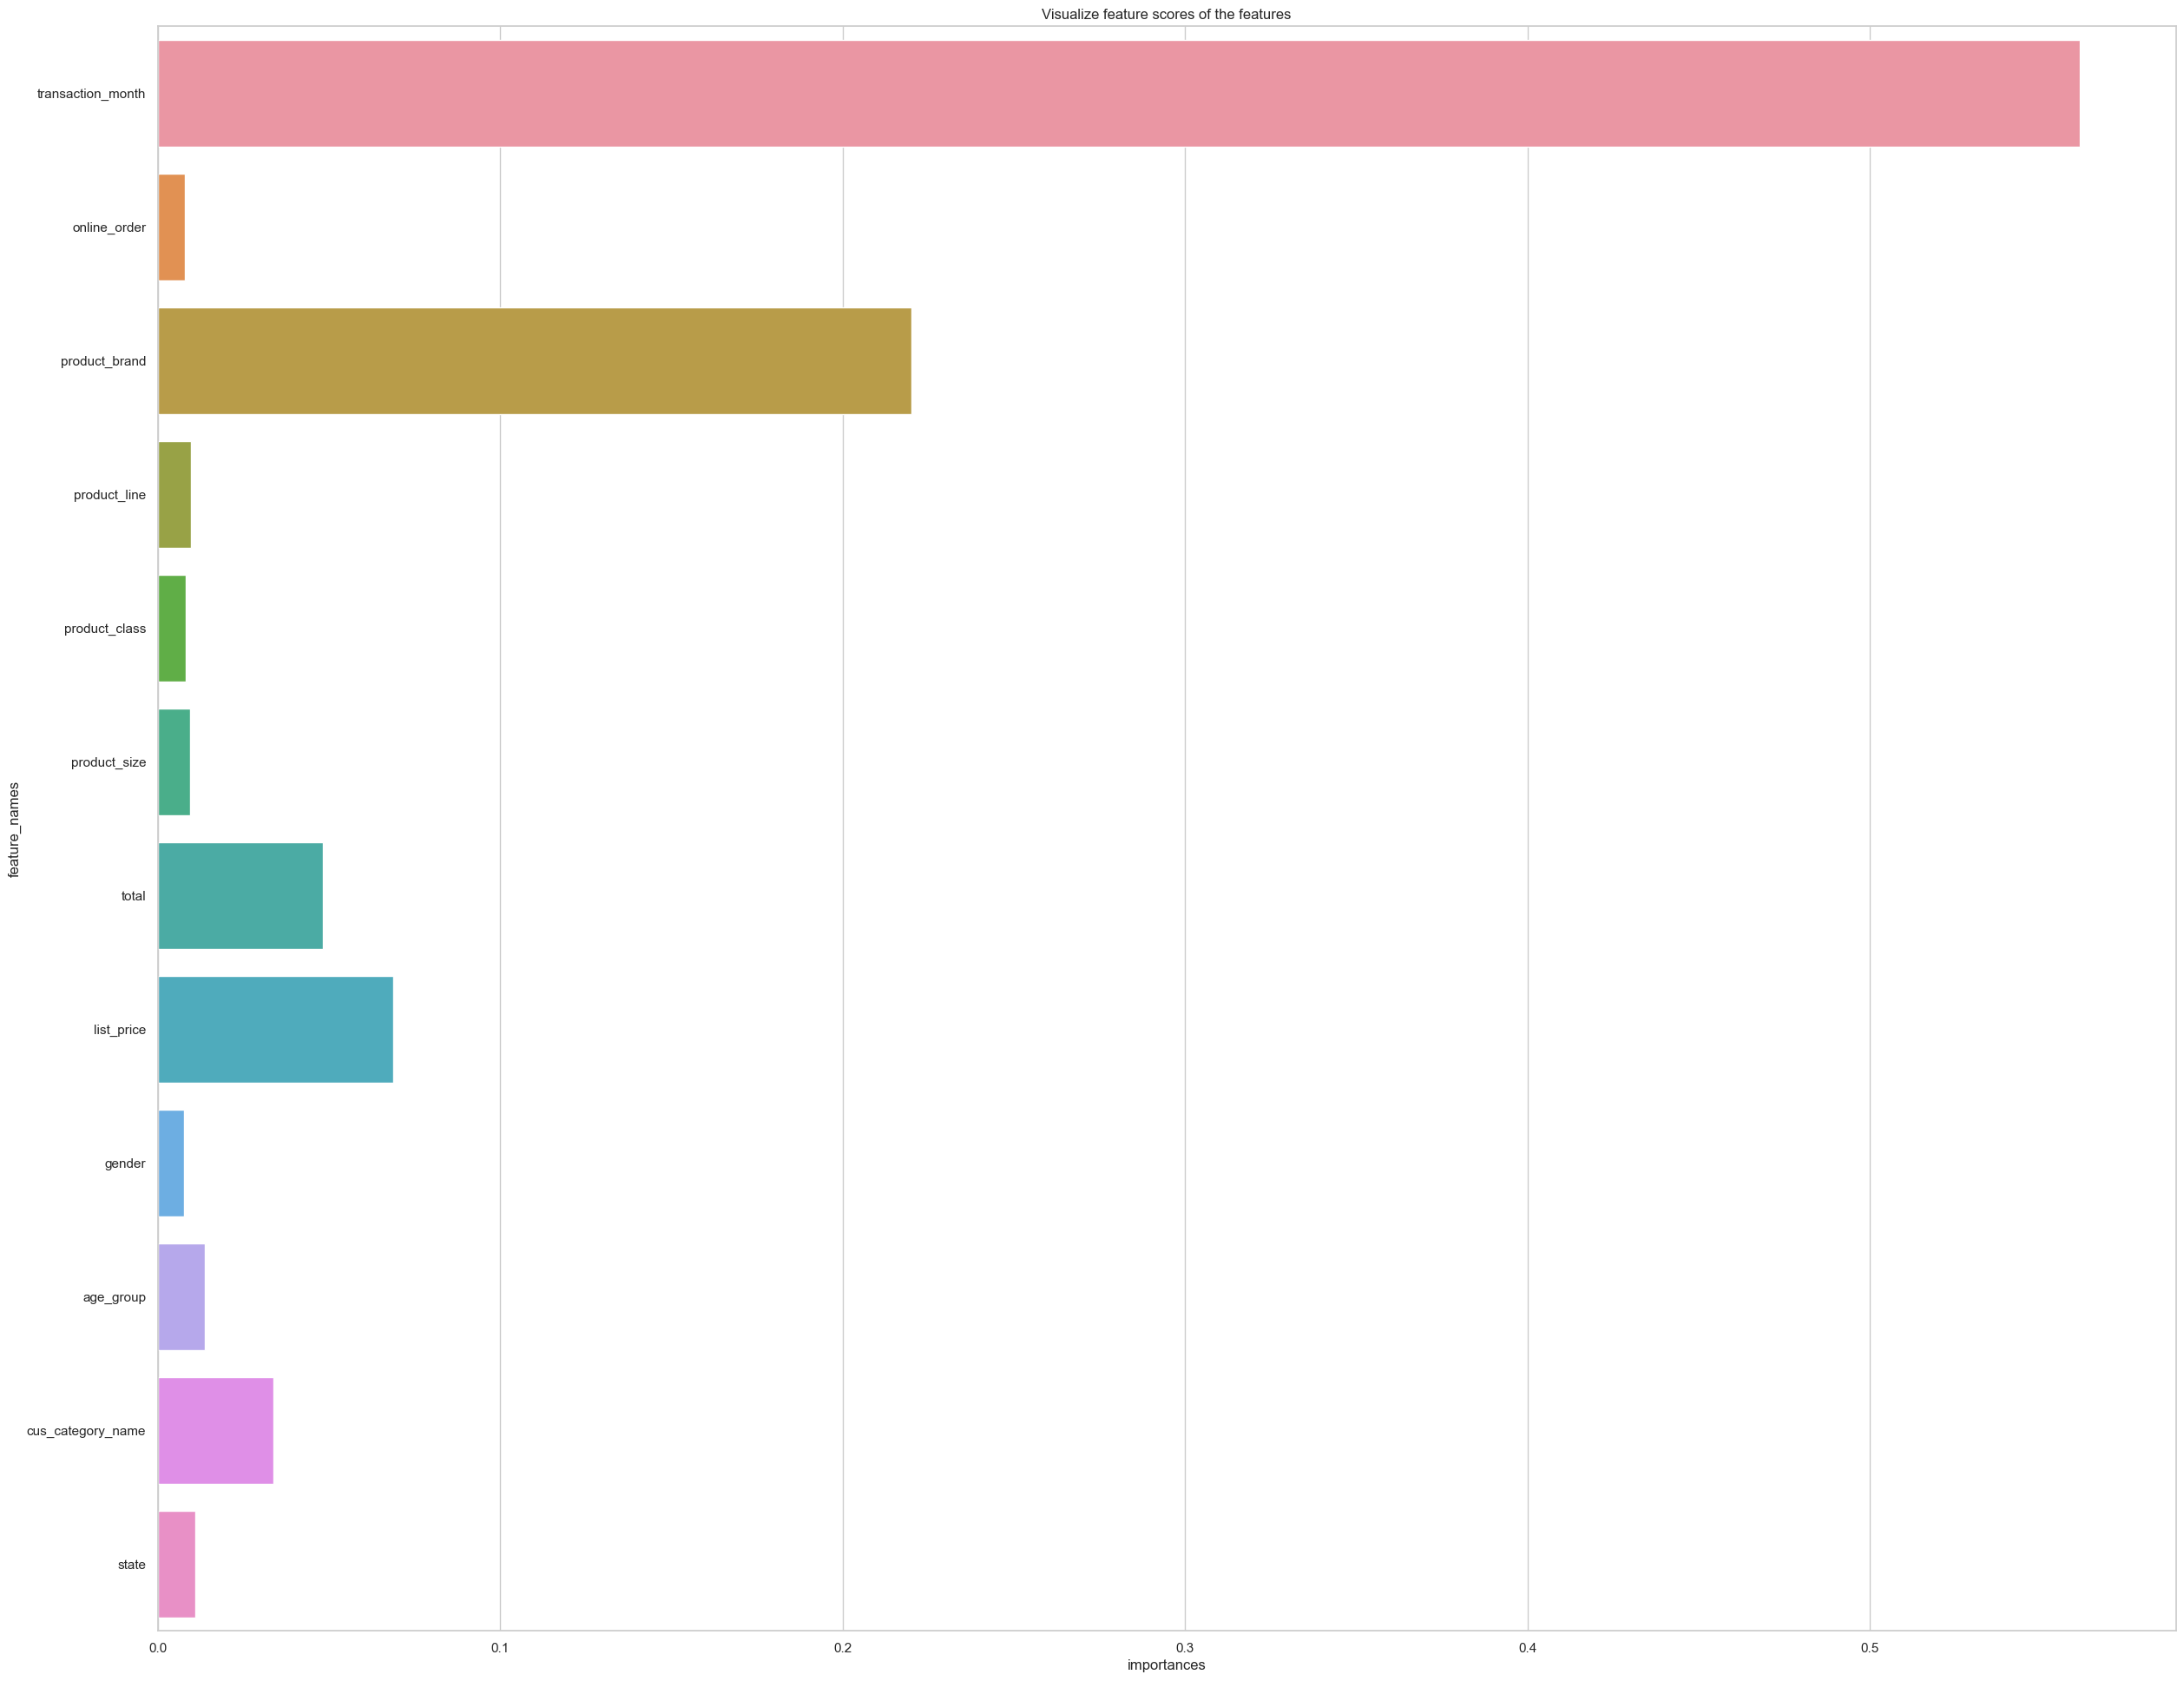

In [25]:
# Tạo một biểu đồ barplot với seaborn

importances_df = pd.DataFrame({'feature_names':feature_names,
                               "importances": importances})

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=importances_df["importances"], y=importances_df["feature_names"])

ax.set_title("Visualize feature scores of the features")
# ax.set_yticklabels(rf.feature_names_in_)
# ax.set_xlabel("Feature importance score")
# ax.set_ylabel("Features")
plt.show()

In [28]:
y_pred_rf

array(['Approved', 'Cancelled', 'Approved', ..., 'Approved', 'Approved',
       'Cancelled'], dtype=object)

### Vẽ cây rút ra tập luật

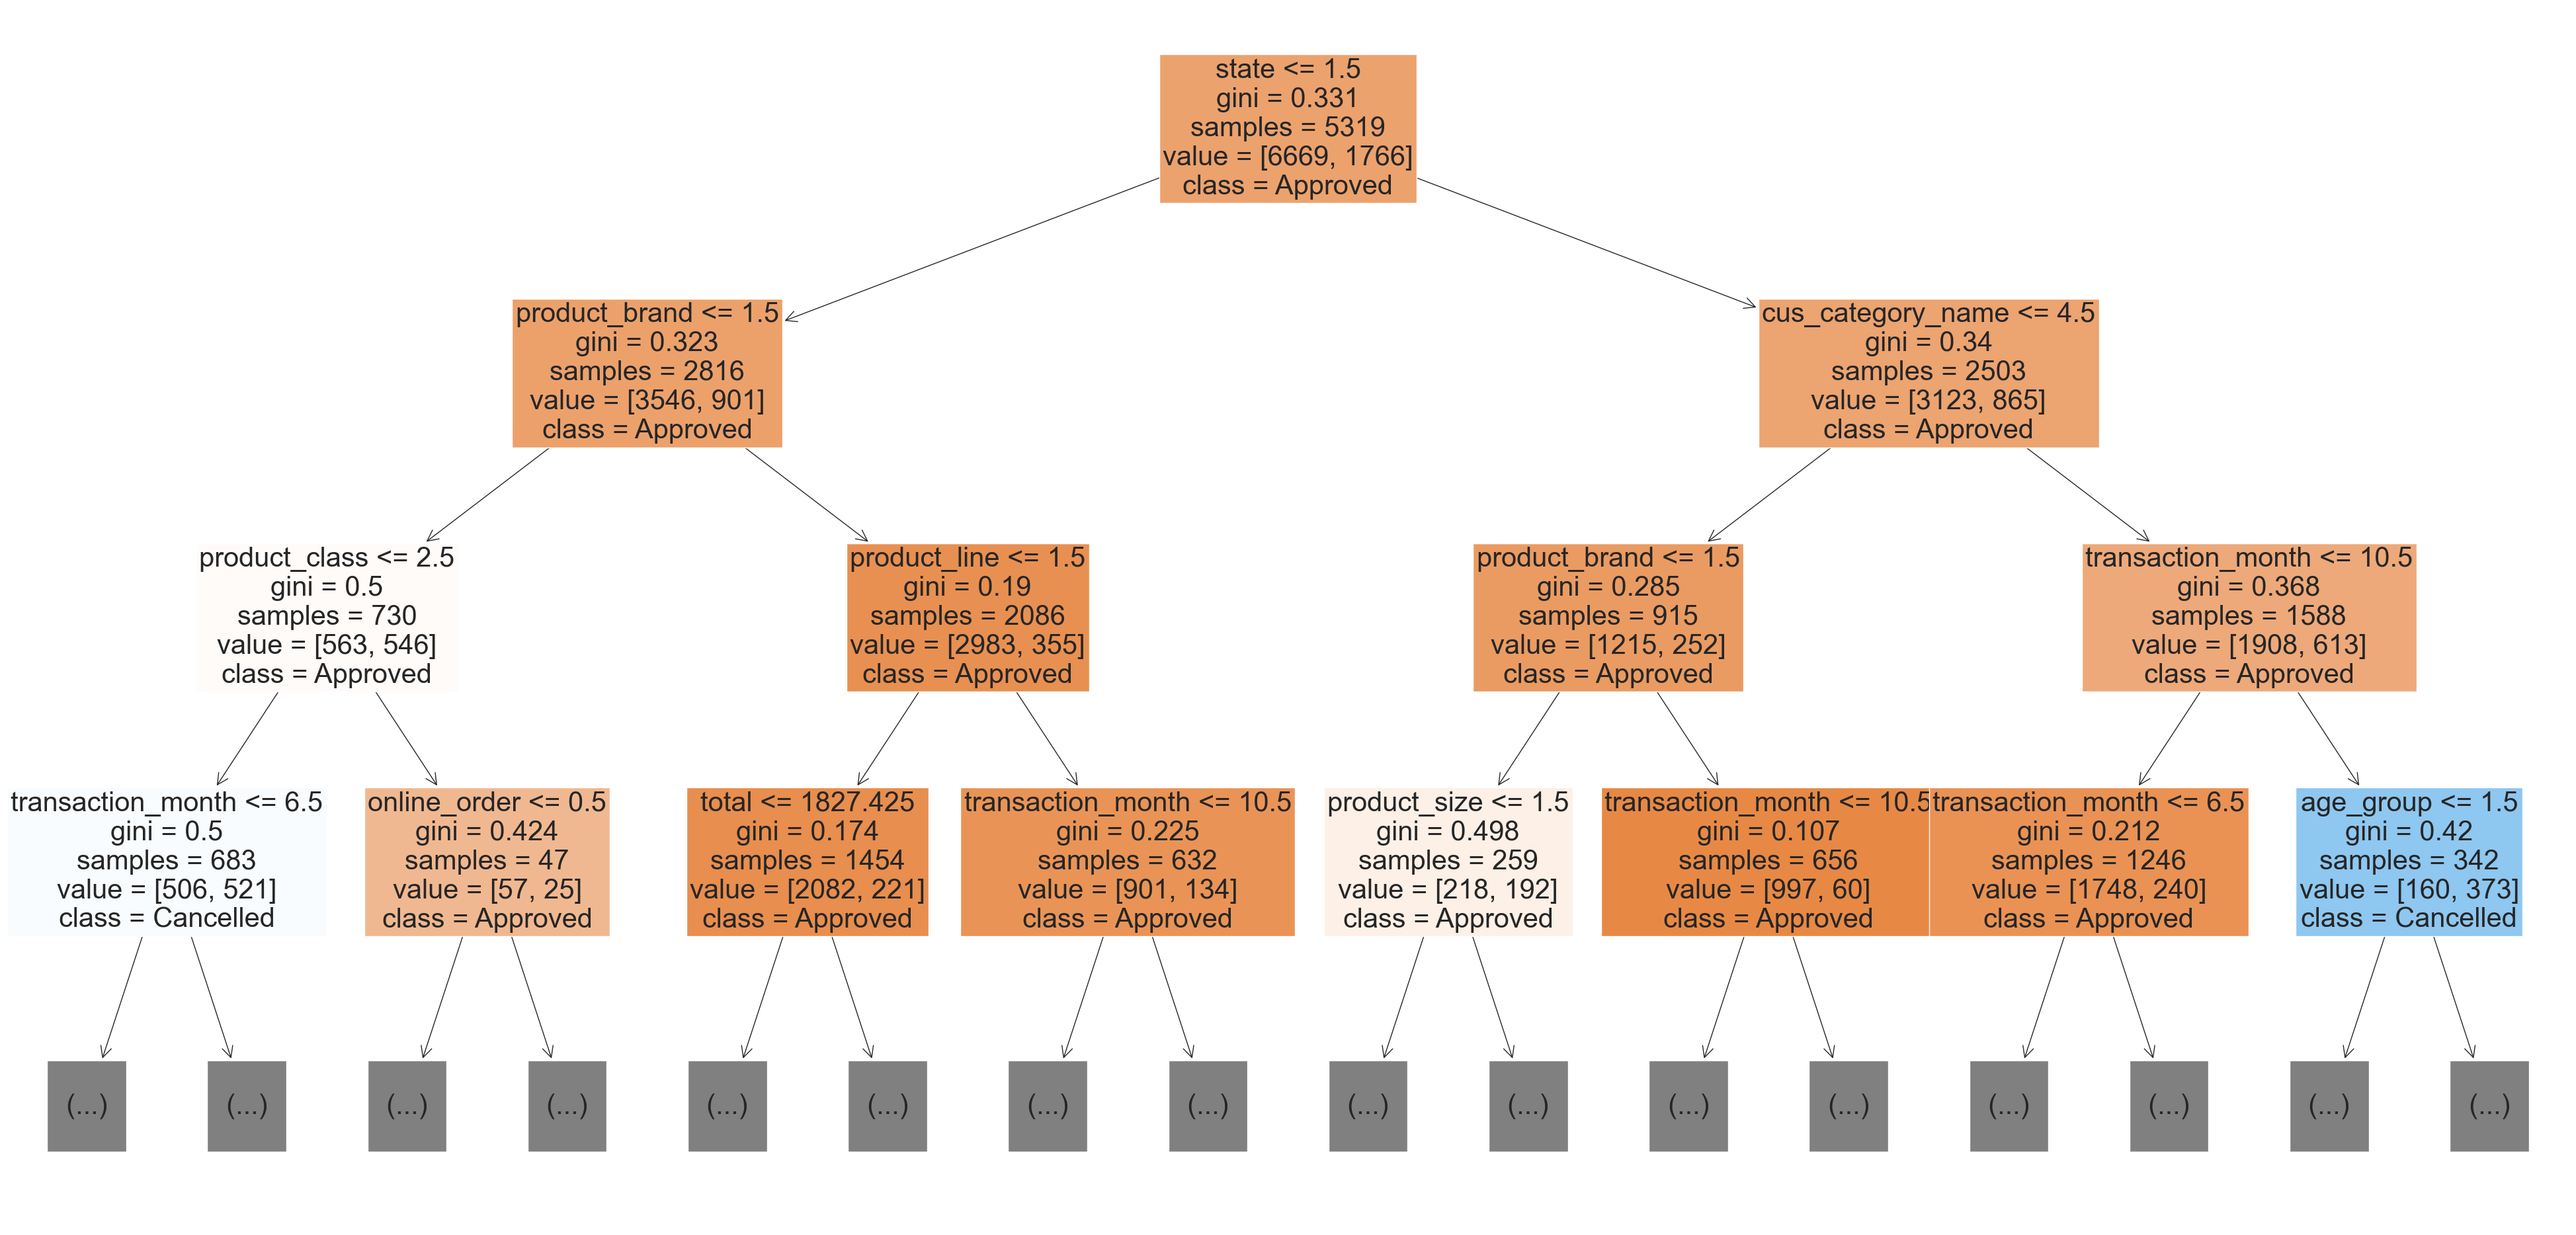

In [29]:
from sklearn import tree
# Truy cập vào cây quyết định đầu tiên trong Random Forest
decision_tree = rf.estimators_[0]

# Vẽ cây quyết định
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(decision_tree, feature_names=feature_names, 
               class_names=y_pred_rf, filled=True, fontsize=30, max_depth=3)
# Lưu hình ảnh của cây quyết định
plt.savefig('decision_tree_random_forest', dpi=100)
plt.show()

# Tạo dữ liệu để dự đoán

In [30]:
# Tạo dòng dữ liệu mới
new_data = {
    'transaction_month':7, 'online_order':0, 'product_brand':3,
    'product_line':1, 'product_class':1, 'product_size':1, 'total':1458.17,
    'list_price':583.27, 'gender':1, 'age_group':3, 'cus_category_name':10, 'state':1
}

In [31]:
# Chuyển từ data về DataFrame
new_data_df = pd.DataFrame([new_data])

## Dự đoán nhãn

In [32]:
# Dự đoán nhãn
predicted_label = rf.predict(new_data_df)

# In ra nhãn
print("transacion_status", predicted_label)

transacion_status ['Approved']


# 3.2 Support Vector Machine Model (SVM)

In [33]:
# Tạo SupportVectorClassifier model
# SVM_model = svm.SVC(kernel='linear', probability=True)
SVM_model = svm.SVC(kernel='linear')

# fit the model to the training set
SVM_model.fit(X_train, y_train)

SVC(kernel='linear')

### Kiểm tra thuộc tính phân lớp và tạo tập thuộc tính độc lập

In [34]:
# Thuộc tính phân lớp
SVM_model.classes_

array(['Approved', 'Cancelled'], dtype=object)

In [35]:
# Thuộc tính độc lập
feature_names_svm = ['transaction_month', 'online_order', 'product_brand',
       'product_line', 'product_class', 'product_size', 'total',
       'list_price', 'gender', 'age_group', 'cus_category_name', 'state']
features = np.array(feature_names_svm)

In [36]:
# Dự đoán trên tập test
y_pred_svm = SVM_model.predict(X_test)

## Tính độ chính xác

In [37]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

    Approved       0.94      0.98      0.96      2849
   Cancelled       0.91      0.77      0.83       767

    accuracy                           0.93      3616
   macro avg       0.92      0.87      0.90      3616
weighted avg       0.93      0.93      0.93      3616



Confusion matrix

 [[2790   59]
 [ 178  589]]


<AxesSubplot: >

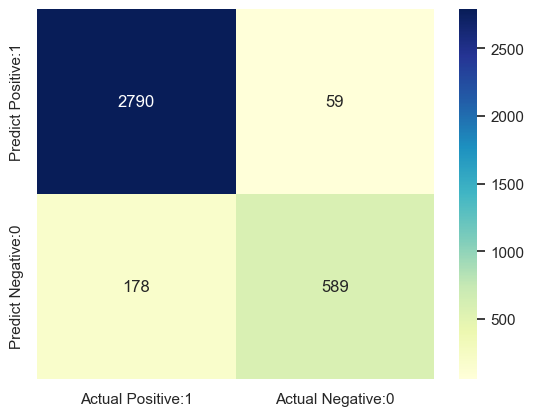

In [64]:
# In Ma trận nhầm lẫn và chia thành 4 phần
cm = confusion_matrix(y_test, y_pred_svm)
print('Confusion matrix\n\n', cm)
# Trực quan hóa ma trận nhầm lẫn với bản đồ nhiệt seaborn
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Nhận xét:
-	Kết quả dự đoán đúng với thực tế Approved là 2790 dòng, với Cancelled là 59 dòng,
-	Kết quả dự đoán sai với thực tế Approved là 178 dòng, với Cancelled là 589 dòng

### Tính toán độ quan trọng.

In [38]:
result = permutation_importance(SVM_model, X_test, y_test, n_repeats = 10, random_state=0)

### Xuất ra kết quả giá trị thuộc tính quan trọng

In [39]:
importance_scores = result.importances_mean
importance_scores

array([ 0.1857854 ,  0.        ,  0.15210177, -0.00080199,  0.00497788,
       -0.00063606,  0.00605642,  0.00412058,  0.        ,  0.        ,
        0.        ,  0.        ])

### Vẽ biểu đồ biễu diễn các thuộc tính

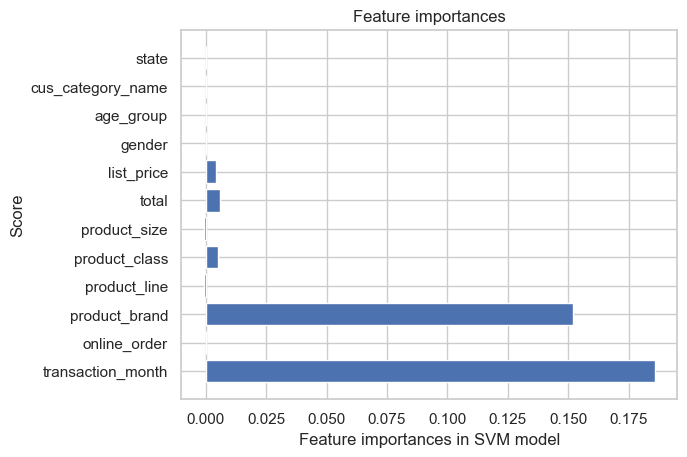

In [40]:
plt.barh(features, importance_scores)
plt.title("Feature importances")
plt.xlabel("Feature importances in SVM model")
plt.ylabel("Score")

plt.show()

# Tạo dữ liệu để dự đoán và dự đoán

In [41]:
# Tạo dòng dữ liệu mới
new_data_svm = {
    'transaction_month':7, 'online_order':0, 'product_brand':3,
       'product_line':1, 'product_class':1, 'product_size':1, 'total':1458.17,
       'list_price':583.27, 'gender':1, 'age_group':3, 'cus_category_name':10, 'state':1
}

In [42]:
# Chuyển từ data về DataFrame
new_data_df_svm = pd.DataFrame([new_data_svm])

## Dự đoán nhãn

In [43]:
# Dự đoán nhãn
predicted_label_svm = SVM_model.predict(new_data_df_svm)

# In ra nhãn
print("transacion_status", predicted_label_svm)

transacion_status ['Approved']
